## Wine Quality Dataset

The dataset used refers to the quality of red wine. It is comprissed of 12 numeric (real) features:
1. Fixed acidity
2. Volatile acidity
3. Citric acidity
4. Residual Sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol

The label is the quality of the wine, an integer number ranging from 0 to 10.

In [18]:
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
from sklearn.decomposition import PCA
import numpy as np
from numpy import linalg as LA
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Data pre-processing

In [2]:
df = pd.read_csv("winequality-red.csv",header = 0,sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


###### Check how many different classes are there.

In [3]:
print(df.describe())
print(df.quality.unique())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

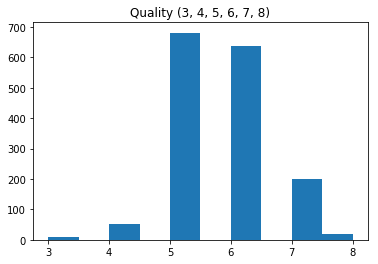

In [4]:
a=df['quality']
plt.hist(a)
plt.title('Quality (3, 4, 5, 6, 7, 8)')
plt.show()

###### The dataset is clearly unbalanced. We will consider any value below 5, to be equal to 5. Analogously, any value above 6 will be set to 6

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\program files\python37\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


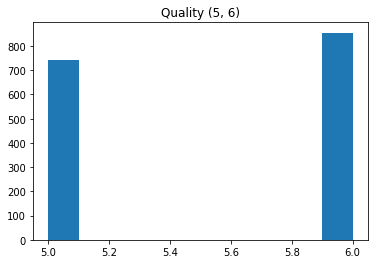

Number of rows with label 5:  744
Number of rows with label 6:  855


In [5]:
label_6 = 0
label_5 = 0
size = len(df['quality'])
for i in range(0,size):
    if(df['quality'][i]<=5):
        df['quality'][i] = 5
        label_5+=1
    else:
        df['quality'][i] = 6
        label_6+=1

a = df['quality']
plt.hist(a)        
plt.title('Quality (5, 6)')
plt.show()
print('Number of rows with label 5: ',label_5)
print('Number of rows with label 6: ',label_6)

###### Check if there any missing values

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###### Separate features from label

In [7]:
label = df['quality']
#print(label)
features = df.drop('quality', 1)
#print(features)

#### Principal Component Analysis

In [8]:
X = features.values # numpy array version of the data
#print(X)
#print(X.shape)
pca = PCA(n_components=11)
pca.fit(X)
print('singular values ', pca.singular_values_)
#print('normalized cumulative sum of eigenvalues \n', pca.explained_variance_ratio_)

singular values  [1.34604001e+03 3.04270910e+02 7.03980188e+01 5.39205496e+01
 4.08907312e+01 8.13338635e+00 6.08784585e+00 4.25812831e+00
 4.01305602e+00 1.52482330e+00 2.99541200e-02]


In [9]:
variance_ratio = pca.explained_variance_

sum_ratios = sum(variance_ratio)
sum_singularValues = sum(pca.singular_values_)

for i in pca.singular_values_:
    ratio = i / sum_singularValues
    print(ratio)

print(variance_ratio)
#print(sum_singularValues)
#print(sum_ratios)

0.7317155110470211
0.1654035114570659
0.03826878988903281
0.029311537746128578
0.022228449411410795
0.0044213581394347895
0.0033093899205821663
0.0023147443711498492
0.0021815215874068997
0.0008289031895255733
1.6283241241330565e-05
[1.13380708e+03 5.79354108e+01 3.10130228e+00 1.81941532e+00
 1.04634036e+00 4.13967294e-02 2.31926578e-02 1.13464685e-02
 1.00779841e-02 1.45499755e-03 5.61482667e-07]


As we can see listes above, we can project the data into the first 6 components in order to attain 99% of the variance. We will considere the data projected on these six components from now onwards.

In [10]:
## Repeating to 
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
## Reconstruction
X1=pca.inverse_transform(X_pca)
a=X-X1
print('The squared error', LA.norm(a))

The squared error 8.580450211303233


#### Plot the data on the two components

In [11]:
y = label.values
#plt.scatter(X_pca[y==5, 0], X1[y==5, 1], color='red', marker='^', alpha=0.5)
#plt.scatter(X_pca[y == 6, 0], X1[y == 6, 1], color='blue', marker='o', alpha=0.5)
#plt.grid()

## Learning Models

On the red wine dataset the following learning models will be applied:
1. Neural Network
2. Random Forests

### Neural Network

In this section we are going to apply a neural network to descriminate between the two classes of wine being used at the moment. Taking into consideration the several hyperparameters in th neural network, in order to attain maximum performance, we are going to change the following hyperparameters:
1. Number of hidden layers
2. Hidden layers size

The maximum number of iteration will be default, thus set to 5000.
The accuracy will be used as a measure of performance. The validation test to be used will be the holdout method - 70% dataset to training, 30% to test.

###### Divide dataset in training and testing

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=0)

The maximum number of hidden layers to be used will be two. The maximum number of each hidden layer will be 10. We are going to test every combination of this number of hidden layers and layer size to determine the best configuration. The learning rate and maximum number of iterations will be the default one for now.

In [60]:
accuracy_list = []
for i in range(0, 10):
    for j in range(1, 10):
        if(i==0):
            mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(j),alpha=0.01, max_iter=5000, random_state=42)
        else:
            mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(j,i),alpha=0.01, max_iter=5000, random_state=42)
        mlp.fit(X_train, y_train)
        performance = mlp.score(X_test, y_test)
        accuracy_list.append(performance)




In [61]:
def getConfiguration(index):
    i, d = divmod(index, 10)
    if(d == 0):
        if(i==0):
            config = [10, i]
        else:
            config = [10, i-1]
    else:
        config = [d, i]
    return config
    
maximum_accuracy = max(accuracy_list)
maximum_index = accuracy_list.index(maximum_accuracy)
print("Maximum index: ", maximum_index)
print("Maximum accuracy: ", maximum_accuracy)
print("Minimum accuracy: ", min(accuracy_list))
config = getConfiguration(maximum_index)
print("Best configuration is: first hidden layer size - "+str(config[0])+"; second hidden layer size - "+str(config[1]))

Maximum index:  4
Maximum accuracy:  0.7625
Minimum accuracy:  0.575
Best configuration is: first hidden layer size - 4; second hidden layer size - 0


After finding the best configuaration, we move on to finding the best learning rate. We will consider the following list for alpha: 0.1, 0.01, 0.001, 0.0001.

In [62]:
accuracy_list_alpha = []
learning_rate = [0.1, 0.01, 0.001, 0.0001]
for i in learning_rate:
    if(config[1]==0):
        mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(config[0]),alpha=i, max_iter=5000, random_state=42)
    else:
        mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(config[0], config[1]),alpha=i, max_iter=5000, random_state=42)
        
    mlp.fit(X_train, y_train)
    performance = mlp.score(X_test, y_test)
    accuracy_list_alpha.append(performance)

maximum_accuracy = max(accuracy_list_alpha)
maximum_index = accuracy_list_alpha.index(maximum_accuracy)

if(maximum_index == 0):
    learning_rate = 0.1
elif(maximum_index == 1):
    learning_rate = 0.01
elif(maximum_index == 2):
    learning_rate = 0.001
else:
    learning_rate = 0.0001

print("Optimal learning rate: ", learning_rate)    
print("Maximum accuracy: ", maximum_accuracy)
accuracy_list_alpha

Optimal learning rate:  0.1
Maximum accuracy:  0.745


[0.745, 0.745, 0.745, 0.745]

Test the optimal model and check its confusion matrix

In [63]:
if(config[1]==0):
    mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(config[0]),alpha=learning_rate, max_iter=5000, random_state=42)
else:
    mlp = MLPClassifier(activation='tanh', hidden_layer_sizes=(config[0], config[1]),alpha=learning_rate, max_iter=5000, random_state=42)

mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)
cm = confusion_matrix(y_test, prediction)
cm

array([[140,  45],
       [ 57, 158]], dtype=int64)

Above we calculate other performance metrics, like the f1 score, precision and recall.

In [64]:
f1 = f1_score(y_test, prediction, average="binary", pos_label=5)
precision = precision_score(y_test, prediction, average="binary", pos_label=5)
recall = recall_score(y_test, prediction, average="binary", pos_label=5)

print("F1 score is ", f1)
print("Precision is ", precision)
print("Recall is ", recall)

F1 score is  0.7329842931937173
Precision is  0.7106598984771574
Recall is  0.7567567567567568


### Random Forest

In the context of the random forest, the hyperparameters to be studied will be:
1. The depth of the decision trees
2. The number of trees

We will vary first the number of trees, from 1 to 150.

In [65]:
forest_accuracy_list = []
for estimators in range(1, 151):
    forest = RandomForestClassifier(max_depth=3, min_samples_split=5,n_estimators=estimators, max_features='log2', oob_score=False, random_state=42)
    forest.fit(X_train, y_train)
    forest_performance = mlp.score(X_test, y_test)
    forest_accuracy_list.append(forest_performance)

forest_maximum_accuracy = max(forest_accuracy_list)
number_estimators = forest_accuracy_list.index(forest_maximum_accuracy)+1
print("The optimal number of estimators is: ",number_estimators)
print("The maximum accuracy is: ", forest_maximum_accuracy)
    

The optimal number of estimators is:  1
The maximum accuracy is:  0.745


The next step is to vary the depth of the decision trees, using a random forest with the optimal number of estimators.

In [66]:
forest_accuracy_list_alpha = []
for i in range(1, 30):
    forest = RandomForestClassifier(max_depth=i, min_samples_split=5,n_estimators=number_estimators, max_features='log2', oob_score=False, random_state=42)
    forest.fit(X_train, y_train)
    performance = mlp.score(X_test, y_test)
    forest_accuracy_list_alpha.append(performance)

maximum_accuracy = max(forest_accuracy_list_alpha)
depth = forest_accuracy_list_alpha.index(maximum_accuracy)+1
print("The optimal depth is: ",depth)
print("The maximum accuracy is: ", maximum_accuracy)
print("The minimum accuracy is: ", min(accuracy_list))

The optimal depth is:  1
The maximum accuracy is:  0.745
The minimum accuracy is:  0.575


In [67]:
forest = RandomForestClassifier(max_depth=depth, min_samples_split=5,n_estimators=number_estimators, max_features='log2', oob_score=False, random_state=42)

forest.fit(X_train, y_train)
prediction = forest.predict(X_test)
cm = confusion_matrix(y_test, prediction)
cm

array([[ 49, 136],
       [ 25, 190]], dtype=int64)

In [68]:
f1 = f1_score(y_test, prediction, average="binary", pos_label=5)
precision = precision_score(y_test, prediction, average="binary", pos_label=5)
recall = recall_score(y_test, prediction, average="binary", pos_label=5)

print("F1 score is ", f1)
print("Precision is ", precision)
print("Recall is ", recall)

F1 score is  0.3783783783783784
Precision is  0.6621621621621622
Recall is  0.2648648648648649


### Evaluation of the models